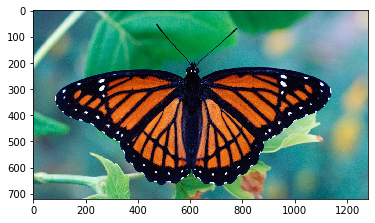

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

#reading in the image
image = cv2.imread('butterfly.jpg')

#making a copy of the image
image_copy = np.copy(image)

#changing color to RGB from BGR
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Preparing data for k mean clustering

In [3]:
#Reshaping image into a 2D array of pixels and 3 color values(RGB)
#k mean algorithm needs a 2D array as an input
pixel_vals = image_copy.reshape((-1,3))

#convert to float type
pixel_vals = np.float32(pixel_vals)

## Implementing K mean clustering

In [19]:
#define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) #if the cluster moves less than "1.0" the algorithm stops and it means that it has converged

#performing k mean clustering
k = 3 #This means it will create 2 different sections of the image with the top two most prevelant colors
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


## Display the results

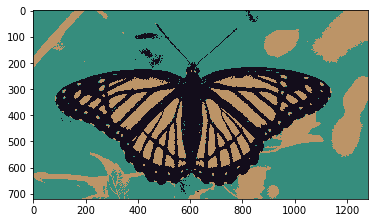

In [20]:
#To display the date we need to convert the data back to a 8 bit image

#converting data to a 8 bit value
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

#reshaping data into the original image dimensions
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0], image_copy.shape[1])

plt.imshow(segmented_image)

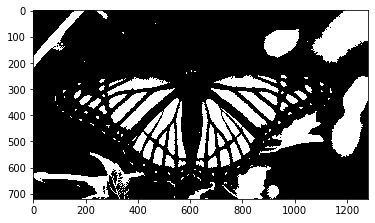

In [21]:
#visualizing one segment

plt.imshow(labels_reshape == 1, cmap = 'gray')

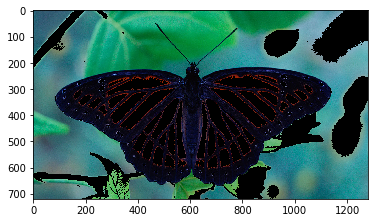

In [22]:
#Masking image segment
masked_image = np.copy(image_copy)

masked_image[labels_reshape == 1 ] = [0, 0, 0]

#Displaying
plt.imshow(masked_image)